<a href="https://colab.research.google.com/github/TashiNyangmi/CEO_Jobs_Council/blob/master/Covid_19_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @author: Tashi T. Gurung
# @author: Ariana Bhigroog
# @author: MJ C

In [ ]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col = 'date', parse_dates = True)

In [ ]:
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0


The County FIPS Code is a 5-digit field containing a unique numeric identification assigned to each county in a given state by the US government.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939988 entries, 2020-01-21 to 2021-01-17
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   county  939988 non-null  object 
 1   state   939988 non-null  object 
 2   fips    931216 non-null  float64
 3   cases   939988 non-null  int64  
 4   deaths  919901 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 43.0+ MB


Seems like there are some missing values

In [ ]:
df.isna().sum()

county        0
state         0
fips       8772
cases         0
deaths    20087
dtype: int64

In [ ]:
df['deaths'].value_counts()

0.0        240034
1.0         91430
2.0         56378
3.0         39186
4.0         31294
            ...  
3417.0          1
23925.0         1
2928.0          1
3426.0          1
3032.0          1
Name: deaths, Length: 3647, dtype: int64

In [ ]:
df[df['fips'].isna()]['county'].value_counts()

Unknown          7938
New York City     323
Kansas City       304
Joplin            207
Name: county, dtype: int64

In [ ]:
len(df)

939988

End of Missing Values

Understand the COVID-19 Data in the last 30 days

In [ ]:
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
df['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [ ]:
bool_mask = df['state'] == 'New York'

In [ ]:
df_ny = df[bool_mask].copy()

In [ ]:
df_ny.head()

,county,state,fips,cases,deaths
date,,,,,
2020-03-01,New York City,New York,NaN,1,0.0
2020-03-02,New York City,New York,NaN,1,0.0
2020-03-03,New York City,New York,NaN,2,0.0
2020-03-04,New York City,New York,NaN,2,0.0
2020-03-04,Westchester,New York,36119.0,9,0.0


In [ ]:
df['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [ ]:
# visualizing state wise deaths
# choosing some states randomly
states = ['New York', 'Washington', 'Arkansas', 'Montana']

In [ ]:
# filter for those states
bool_mask = (df['state'] == 'New York') | (df['state'] == 'Washington') | (df['state'] == 'Arkansas') | (df['state'] == 'Montana')
data = df[bool_mask]

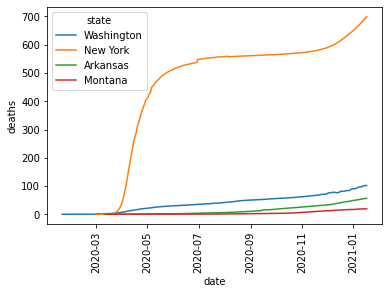

In [ ]:
sns.lineplot(x = data.index, y = data['deaths'], hue = data['state'],err_style= None)
plt.xticks(rotation = 90);

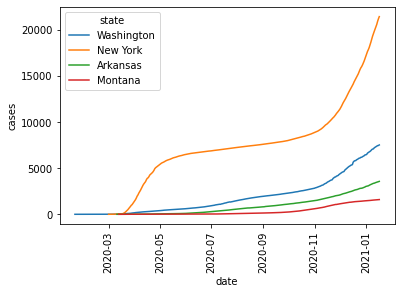

In [ ]:
sns.lineplot(x = data.index, y = data['cases'], hue = data['state'],err_style= None)
plt.xticks(rotation = 90);

In [ ]:
# QUESTION # 3

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col = 'date', parse_dates = True)

In [ ]:
# filtering for state:NY and county:New York City
bool_mask = (df['state'] == "New York") & (df['county']== 'New York City')
df_ny = df[bool_mask].copy()

# filter for last 30 days
df_ny_30 = df_ny.loc['2020-dec-19':].copy()

In [ ]:
# NEEDS MAJOR REFACTORING

# absoulte change
# for all rows
df_ny_30['new_cases'] = df_ny_30['cases'] - df_ny_30['cases'].shift(1)
df_ny_30['new_deaths'] = df_ny_30['deaths'] - df_ny_30['deaths'].shift(1)

# for the first row
df_ny_30.loc['2020-12-19','new_cases'] = df_ny.loc['2020-12-19','cases'] - df_ny.loc['2020-12-18','cases']
df_ny_30.loc['2020-12-19','new_deaths'] = df_ny.loc['2020-12-19','deaths'] - df_ny.loc['2020-12-18','deaths']

# -----------------------------------------------# 
# percentage change
# for all rows
df_ny_30['percentage_new_cases'] = (df_ny_30['cases'] - df_ny_30['cases'].shift(1) ) / df_ny_30['cases'].shift(1)
df_ny_30['percentage_new_deaths'] = (df_ny_30['deaths'] - df_ny_30['deaths'].shift(1) ) /df_ny_30['deaths'].shift(1)

# for first row
df_ny_30.loc['2020-12-19','percentage_new_cases'] = (df_ny.loc['2020-12-19','cases'] - df_ny.loc['2020-12-18','cases']) / df_ny.loc['2020-12-18','cases']
df_ny_30.loc['2020-12-19','percentage_new_deaths'] = (df_ny.loc['2020-12-19','deaths'] - df_ny.loc['2020-12-18','deaths']) / df_ny.loc['2020-12-18','deaths']
 
# reformating the percentages columns
df_ny_30['percentage_new_cases'] = round(df_ny_30['percentage_new_cases'], 6) * 100
df_ny_30['percentage_new_deaths'] = round(df_ny_30['percentage_new_deaths'], 6) * 100
df_ny_30.head()

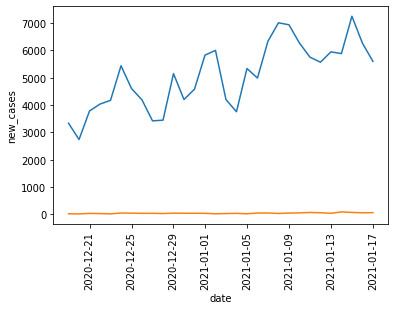

In [ ]:
sns.lineplot(x = df_ny_30.index, y = df_ny_30['new_cases'], err_style= None)
sns.lineplot(x = df_ny_30.index, y = df_ny_30['new_deaths'],err_style= None)
plt.xticks(rotation = 90);

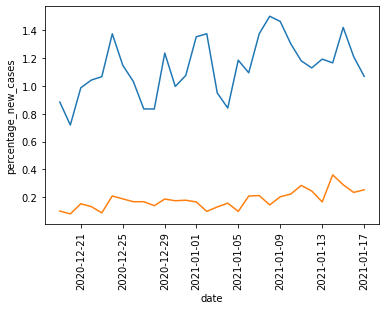

In [ ]:
sns.lineplot(x = df_ny_30.index, y = df_ny_30['percentage_new_cases'], err_style= None)
sns.lineplot(x = df_ny_30.index, y = df_ny_30['percentage_new_deaths'],err_style= None)
plt.xticks(rotation = 90);